# Notebook example of training and generating WWT data

In [7]:
import sys
sys.path.append("..")

from gan import output
sys.modules["output"] = output

from gan.doppelganger import DoppelGANger
from gan.util import add_gen_flag, normalize_per_sample
from gan.load_data import load_data
from gan.network import DoppelGANgerGenerator, Discriminator, AttrDiscriminator
import os
import tensorflow as tf

/home/lipika/anaconda3/envs/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lipika/anaconda3/envs/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lipika/anaconda3/envs/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lipika/anaconda3/envs/tf1/lib/python3.6/site-pack

In [8]:
sample_len = 10 # this is the number of time steps generated at each RNN rollout

# the dataset was downloaded from https://drive.google.com/drive/folders/19hnyG8lN9_WWIac998rT6RtBB9Zit70X 
# and placed in the data folder
(data_feature, data_attribute, data_gen_flag, data_feature_outputs, data_attribute_outputs) = \
    load_data("../data/web/")
print(data_feature.shape)
print(data_attribute.shape)
print(data_gen_flag.shape)

(50000, 550, 1)
(50000, 14)
(50000, 550)


In [9]:
data_attribute

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [8]:
(data_feature, data_attribute, data_attribute_outputs,
 real_attribute_mask) = normalize_per_sample(
    data_feature, 
    data_attribute, 
    data_feature_outputs, 
    data_attribute_outputs)
print(real_attribute_mask)
print(data_feature.shape)
print(data_attribute.shape) ## note that this adds two attributes, one with (max_ + min_) / 2.0, one with (max_ - min_) / 2.0
print(len(data_attribute_outputs)) ## hence number of outputs increases by two as well. and these are of type CONTINUOUS with ZERO_ONE normalization

[True, True, True, False, False]
(50000, 550, 1)
(50000, 16)
5


In [10]:
data_feature, data_feature_outputs = add_gen_flag(
    data_feature, data_gen_flag, data_feature_outputs, sample_len)
print(data_feature.shape) ## this adds one variable with two dims with a gen flag for 
                          ## whether the time series is active or no (vectors of type [1,0])
print(len(data_feature_outputs)) ## hence number of feature outputs increases by one

(50000, 550, 3)
2


In [11]:
generator = DoppelGANgerGenerator(
    feed_back=False,
    noise=True,
    feature_outputs=data_feature_outputs,
    attribute_outputs=data_attribute_outputs,
    real_attribute_mask=real_attribute_mask,
    sample_len=sample_len)
discriminator = Discriminator()
attr_discriminator = AttrDiscriminator()

In [12]:
checkpoint_dir = "checkpoint_web"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
sample_dir = "checkpoint_web"
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)
time_path = "checkpoint_web"
epoch = 400
batch_size = 100
vis_freq = 200
vis_num_sample = 5
d_rounds = 1
g_rounds = 1
d_gp_coe = 10.0
attr_d_gp_coe = 10.0
g_attr_d_coe = 1.0
extra_checkpoint_freq = 5
num_packing = 1

run_config = tf.ConfigProto()
sess= tf.compat.v1.Session(config=run_config)

gan = DoppelGANger(
    sess=sess,
    checkpoint_dir=checkpoint_dir,
    sample_dir=sample_dir,
    time_path=time_path,
    epoch=epoch,
    batch_size=batch_size,
    data_feature=data_feature,
    data_attribute=data_attribute,
    real_attribute_mask=real_attribute_mask,
    data_gen_flag=data_gen_flag,
    sample_len=sample_len,
    data_feature_outputs=data_feature_outputs,
    data_attribute_outputs=data_attribute_outputs,
    vis_freq=vis_freq,
    vis_num_sample=vis_num_sample,
    generator=generator,
    discriminator=discriminator,
    attr_discriminator=attr_discriminator,
    d_gp_coe=d_gp_coe,
    attr_d_gp_coe=attr_d_gp_coe,
    g_attr_d_coe=g_attr_d_coe,
    d_rounds=d_rounds,
    g_rounds=g_rounds,
    num_packing=num_packing,
    extra_checkpoint_freq=extra_checkpoint_freq)
gan.build()




Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.cast` instead.
Layers of DoppelGANge

In [ ]:
# with sess.as_default():
#     gan.train()

In [13]:
gan.load(checkpoint_dir='checkpoint_web')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../checkpoint_web/model-199999


199999

In [14]:
if data_feature.shape[1] % sample_len != 0:
    raise Exception("length must be a multiple of sample_len")
length = int(data_feature.shape[1] / sample_len)

In [16]:
total_generate_num_sample = 50000 * 2 #one for a hypothetical training set, one for test

In [17]:
real_attribute_input_noise = gan.gen_attribute_input_noise(total_generate_num_sample)
addi_attribute_input_noise = gan.gen_attribute_input_noise(total_generate_num_sample)
feature_input_noise = gan.gen_feature_input_noise(total_generate_num_sample, length)
input_data = gan.gen_feature_input_data_free(total_generate_num_sample)

In [19]:
features, attributes, gen_flags, lengths = gan.sample_from(
                    real_attribute_input_noise, addi_attribute_input_noise,
                    feature_input_noise, input_data, 
                        )

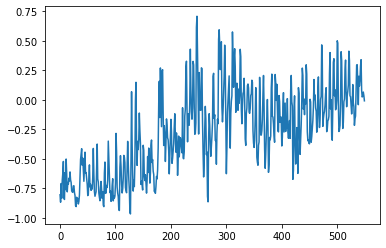

In [27]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(features[100,:,])

In [31]:
from gan.util import renormalize_per_sample
num_real_attribute = len(data_attribute_outputs)-2
features, attributes = renormalize_per_sample(
    features, attributes, data_feature_outputs,
    data_attribute_outputs, gen_flags,
    num_real_attribute=num_real_attribute)

In [ ]:
save_path = os.path.join(
    ".",
    "generated_samples")
if not os.path.exists(save_path):
    os.makedirs(save_path)

train_path = os.path.join(
    save_path, "generated_data_train.npz")
test_path = os.path.join(
    save_path, "generated_data_test.npz")
if os.path.exists(test_path):
    print("Save_path {} exists".format(save_path))
    exit()

In [ ]:
split = total_generate_num_sample/2
np.savez(
    train_path,
    data_feature=features[0: split],
    data_attribute=attributes[0: split],
    data_gen_flag=gen_flags[0: split])
np.savez(
    test_path,
    data_feature=features[split:],
    data_attribute=attributes[split:],
    data_gen_flag=gen_flags[split:])

In [ ]:
sess.close()

### Check output


In [179]:
import numpy as np

In [180]:
a = np.load('generated_samples/generated_data_train.npz')
b = np.load('generated_samples/generated_data_test.npz')

In [181]:
import pandas as pd
dfo = pd.read_csv('../data/train_1.csv') # this is the dataset from kaggle 
                                        # https://www.kaggle.com/c/web-traffic-time-series-forecasting/data?select=train_1.csv.zip
date_colnames = pd.to_datetime((dfo.columns[1:])).date
dfo['domain'], dfo['access'], dfo['agent'] = dfo['Page'].apply(lambda x: x.rsplit('_',3)[1]),\
dfo['Page'].apply(lambda x: x.rsplit('_',2)[1]),\
dfo['Page'].apply(lambda x: x.rsplit('_',2)[2])

In [209]:
data_feature_samples = b.get("data_feature")
data_attribute_samples = b.get("data_attribute")

In [210]:
out_df = pd.DataFrame(data_feature_samples.reshape(data_feature_samples.shape[0], -1))
out_df.columns = date_colnames

In [211]:
out_df['domain'] = np.argmax(data_attribute_samples[:,:9], axis = 1)
out_df['access'] = np.argmax(data_attribute_samples[:,9:12], axis = 1)
out_df['agent']  = np.argmax(data_attribute_samples[:,12:], axis = 1)

out_df['domain_name'] = np.sort(dfo['domain'].unique())[np.argmax(data_attribute_samples[:,:9], axis = 1)]
out_df['access_name'] = np.sort(dfo['access'].unique())[np.argmax(data_attribute_samples[:,9:12], axis = 1)]
out_df['agent_name'] = np.sort(dfo['agent'].unique())[np.argmax(data_attribute_samples[:,12:], axis = 1)]

In [212]:
original_domain =  pd.np.argmax(data_attribute[:,:9], axis = 1)
original_access = np.argmax(data_attribute_samples[:,9:12], axis = 1)
original_agent  = np.argmax(data_attribute_samples[:,12:], axis = 1)

/home/lipika/anaconda3/envs/tf1/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


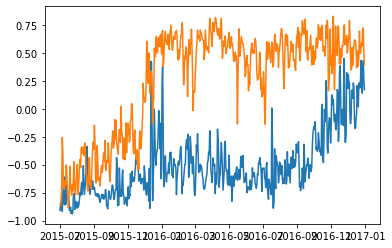

In [215]:
example = out_df[(out_df.domain_name == 'commons.wikimedia.org') & (out_df.access_name == 'mobile-web') & (out_df.agent_name == 'all-agents')].sample(10)
plt.plot(example.iloc[1,:-6]);
plt.plot(example.iloc[6,:-6]);

In [216]:
out_df.to_csv('wwt-sample2.csv')

### Reshape original data sample from numpy to pandas df 

In [225]:
import pandas as pd
original_df = pd.DataFrame(data_feature[:,:,0])
original_df.columns = date_colnames

In [228]:
original_df.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,-0.953478,-0.890449,-0.869384,-0.841322,-0.763911,-0.859178,-0.845235,-0.833588,-0.849179,-0.881915,...,-0.809256,-0.689042,-0.714770,-0.665952,-0.704318,-0.617783,-0.516602,-0.542549,-0.597727,-0.653796
1,-0.652367,-0.665763,-0.749920,-0.796235,-0.749920,-0.940103,-0.823950,-0.712078,-0.665763,-0.796235,...,-0.489900,-0.652367,-0.712078,-0.652367,-0.616699,-0.606052,-0.665763,-0.680083,-0.796235,-0.680083
2,0.056571,0.035157,-0.100391,-0.342879,-0.264962,-0.038755,-0.019944,-0.089247,-0.094342,-0.227595,...,-0.619415,-0.758977,-0.856946,-0.932253,-0.788382,-0.689900,-0.619415,-0.628571,-0.719442,-0.812384
3,-0.199499,-0.199499,-0.216112,-0.216112,-0.311184,-0.233432,-0.344652,-0.216112,-0.023780,-0.251522,...,-0.311184,0.044205,-0.146175,-0.435463,-0.356449,-0.224680,-0.290310,-0.175786,-0.260878,-0.183538
4,-0.066951,-0.571080,-0.833646,-0.532329,-0.391577,-0.149342,0.026857,0.083221,0.105196,-0.019007,...,-0.595940,-0.240882,-0.349205,-0.426029,-0.547453,-0.420111,-0.444236,-0.380625,-0.450464,-0.539831


In [234]:
original_df['domain'] = np.argmax(data_attribute[:,:9], axis = 1)
original_df['access'] = np.argmax(data_attribute[:,9:12], axis = 1)
original_df['agent']  = np.argmax(data_attribute[:,12:14], axis = 1)

original_df['domain_name'] = np.sort(dfo['domain'].unique())[np.argmax(data_attribute[:,:9], axis = 1)]
original_df['access_name'] = np.sort(dfo['access'].unique())[np.argmax(data_attribute[:,9:12], axis = 1)]
original_df['agent_name'] = np.sort(dfo['agent'].unique())[np.argmax(data_attribute[:,12:14], axis = 1)]

In [238]:
original_df.to_csv('wwt-50k-training.csv')

### Plotting distribution of attributes

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_attributes(
    real:pd.DataFrame,
    synthetic:pd.DataFrame,
    attribute_names = ['domain','access','agent'], 
    figsize=(20,6),
):

    fig, axs = plt.subplots(1,3,figsize=(20,6))

    for i, v in enumerate(attribute_names):
        labels =  np.sort(real[v + '_name'].unique())
        r = real[v].value_counts(sort=False).values
        s = synthetic[v].value_counts(sort=False).values

        x = np.arange(len(labels))
        width = 0.35 
        
        rects1 = axs[i].bar(x - width/2, r, width, label='real')
        rects2 = axs[i].bar(x + width/2, s, width, label='synthetic')

        
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Distribution of {v}')
        axs[i].set_xticks(x); axs[i].set_xticklabels(labels, ha="right",rotation = 45)
        axs[i].legend(); 
    fig.tight_layout()
    plt.plot()
    return fig, axs

wwt = pd.read_csv('wwt-50k-training.csv', index_col=0)
synthetic = pd.read_csv('wwt-sample2.csv', index_col=0)
%matplotlib inline
fig, axs = plot_attributes(attribute_names = ['domain','access','agent'], 
                    figsize=(20,6),
                    real=wwt,
                    synthetic=synthetic)


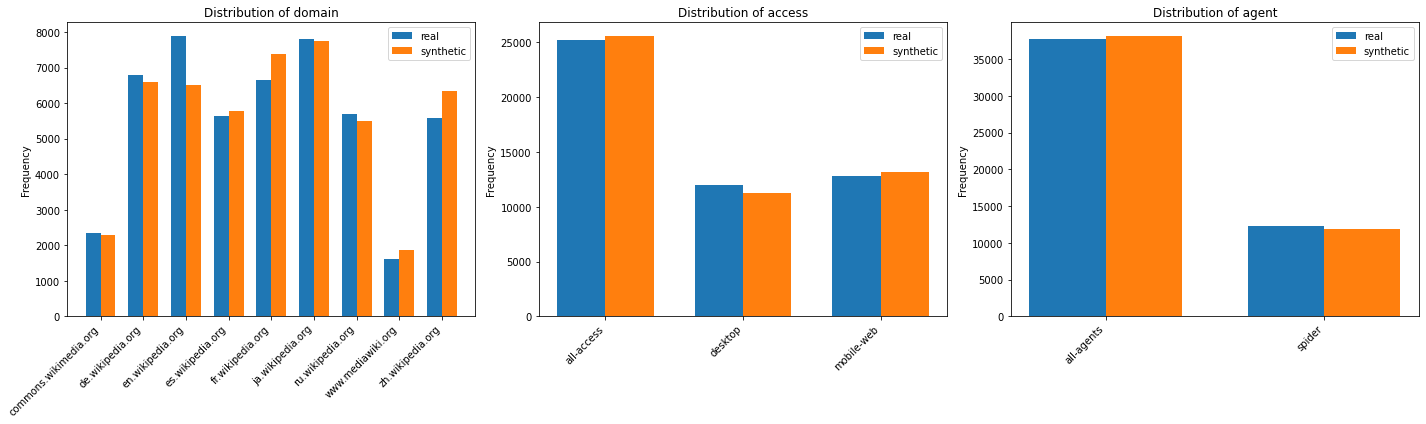

In [28]:
%matplotlib inline
fig, axs = plot_attributes(attribute_names = ['domain','access','agent'], 
                    figsize=(20,6),
                    real=wwt,
                    synthetic=synthetic)
